In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house = pd.read_table("AmesHousing.txt", delimiter = "\t" )

In [3]:
house_csv = pd.read_csv("AmesHousing.txt", delimiter = "\t" )

In [24]:
no_rows = house_csv.shape[0]
half = int(no_rows/2)
half

1465

In [7]:
train = house_csv[:half]
test = house_csv[half:]

In [8]:
train.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [9]:
target = 'SalePrice'

# 'Overall Cond'
# 'Garage Area'
# 'Gr Liv Area'

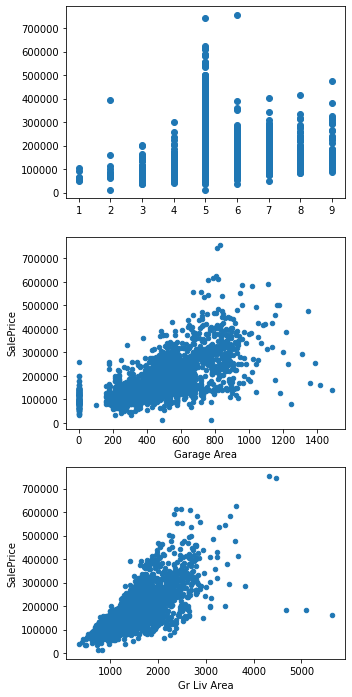

In [14]:
fig = plt.figure(figsize = (5,12))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(house_csv['Overall Cond'], house_csv["SalePrice"]) # matplotlib
house_csv.plot.scatter('Garage Area', "SalePrice", ax = ax2) # pandas
house_csv.plot('Gr Liv Area', "SalePrice", ax = ax3, kind = "scatter") # pandas

In [16]:
house_csv[['Overall Cond','Garage Area','Gr Liv Area','SalePrice']].corr()#["SalePrice"]

Overall Cond   -0.101697
Garage Area     0.640401
Gr Liv Area     0.706780
SalePrice       1.000000
Name: SalePrice, dtype: float64

# Univariate

y = coef*x + intercept

y = mx + b

y = ax + $a_0$


In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(train[["Gr Liv Area"]],train["SalePrice"])
coef = model.coef_
inter = model.intercept_

In [20]:
print(coef)
print(inter)

[116.87449456]
5412.880611440254


In [21]:
# y = 116.87449456*x + 5412.880611440254

In [25]:
predict = model.predict(test[["Gr Liv Area"]])
predict[:5]

array([197087.0516883 , 211579.48901362, 228409.41623013, 104522.45199752,
       104522.45199752])

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test["SalePrice"], predict)
rmse = (mse**0.5)
rmse

57120.50729008638